In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Vértices de un cubo centrado en el origen
cube_vertices = np.array([
    [-1, -1, -1],
    [ 1, -1, -1],
    [ 1,  1, -1],
    [-1,  1, -1],
    [-1, -1,  1],
    [ 1, -1,  1],
    [ 1,  1,  1],
    [-1,  1,  1]
])

# Aristas del cubo (pares de índices)
cube_edges = [
    (0,1),(1,2),(2,3),(3,0),
    (4,5),(5,6),(6,7),(7,4),
    (0,4),(1,5),(2,6),(3,7)
]


In [3]:
def normalize(v):
    return v / np.linalg.norm(v)

def look_at(eye, target, up):
    # Vector w (forward)
    w = normalize(eye - target)

    # Vector u (right)
    u = normalize(np.cross(up, w))

    # Vector v (up real)
    v = np.cross(w, u)

    # Matriz de rotación
    R = np.array([
        [u[0], u[1], u[2], 0],
        [v[0], v[1], v[2], 0],
        [w[0], w[1], w[2], 0],
        [0,    0,    0,    1]
    ])

    # Matriz de traslación
    T = np.array([
        [1, 0, 0, -eye[0]],
        [0, 1, 0, -eye[1]],
        [0, 0, 1, -eye[2]],
        [0, 0, 0, 1]
    ])

    return R @ T


In [4]:
def perspective_projection(points):
    projected = []
    for p in points:
        x, y, z = p
        if z != 0:
            projected.append([x / -z, y / -z])
        else:
            projected.append([x, y])
    return np.array(projected)


In [5]:
# Cámara 1
eye1 = np.array([5, 5, 5])
target1 = np.array([0, 0, 0])
up1 = np.array([0, 1, 0])

# Cámara 2
eye2 = np.array([0, 5, 5])
target2 = np.array([0, 0, 0])
up2 = np.array([0, 1, 0])

view1 = look_at(eye1, target1, up1)
view2 = look_at(eye2, target2, up2)

print("Cámara 1:")
print("Posición:", eye1)
print("Objetivo:", target1)
print("Up:", up1)

print("\nCámara 2:")
print("Posición:", eye2)
print("Objetivo:", target2)
print("Up:", up2)


Cámara 1:
Posición: [5 5 5]
Objetivo: [0 0 0]
Up: [0 1 0]

Cámara 2:
Posición: [0 5 5]
Objetivo: [0 0 0]
Up: [0 1 0]


In [6]:
def transform_points(points, matrix):
    points_h = np.hstack((points, np.ones((points.shape[0],1))))
    transformed = (matrix @ points_h.T).T
    return transformed[:, :3]

cube_cam1 = transform_points(cube_vertices, view1)
cube_cam2 = transform_points(cube_vertices, view2)


In [7]:
proj1 = perspective_projection(cube_cam1)
proj2 = perspective_projection(cube_cam2)


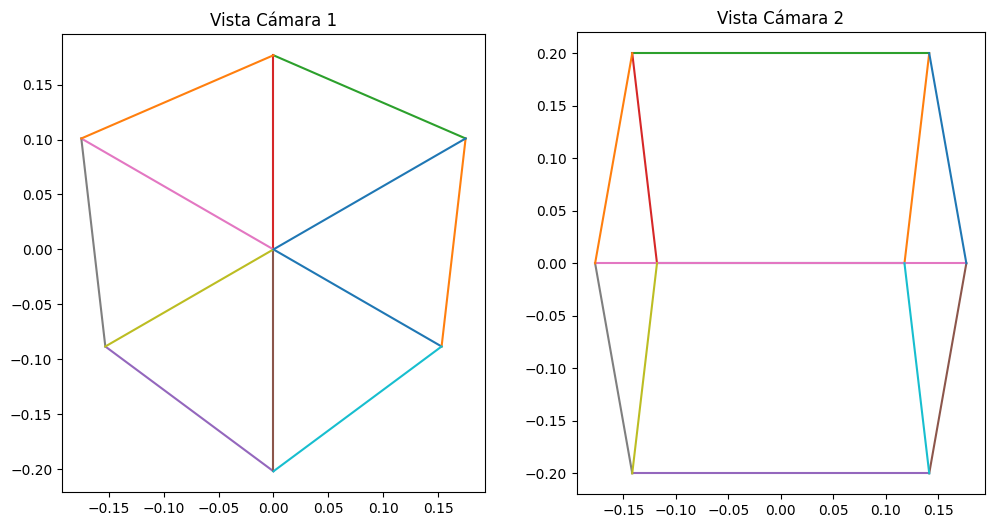

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

def draw_cube(ax, projected, title):
    for edge in cube_edges:
        p1 = projected[edge[0]]
        p2 = projected[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]])
    ax.set_title(title)
    ax.set_aspect('equal')

draw_cube(axs[0], proj1, "Vista Cámara 1")
draw_cube(axs[1], proj2, "Vista Cámara 2")

plt.show()
